In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fancyimpute import KNN # pip install fancyimpute
from sklearn.cluster import Birch 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from pycaret.clustering import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("credit-card-data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df = df.drop("CUST_ID", axis=1)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### KNN Imputation

In [7]:
imputer = KNN()
new_df = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)

Imputing row 1/8950 with 0 missing, elapsed time: 37.316
Imputing row 101/8950 with 0 missing, elapsed time: 37.393
Imputing row 201/8950 with 0 missing, elapsed time: 37.410
Imputing row 301/8950 with 0 missing, elapsed time: 37.415
Imputing row 401/8950 with 0 missing, elapsed time: 37.424
Imputing row 501/8950 with 0 missing, elapsed time: 37.428
Imputing row 601/8950 with 0 missing, elapsed time: 37.431
Imputing row 701/8950 with 0 missing, elapsed time: 37.436
Imputing row 801/8950 with 0 missing, elapsed time: 37.441
Imputing row 901/8950 with 0 missing, elapsed time: 37.456
Imputing row 1001/8950 with 0 missing, elapsed time: 37.466
Imputing row 1101/8950 with 0 missing, elapsed time: 37.477
Imputing row 1201/8950 with 0 missing, elapsed time: 37.482
Imputing row 1301/8950 with 0 missing, elapsed time: 37.491
Imputing row 1401/8950 with 0 missing, elapsed time: 37.498
Imputing row 1501/8950 with 0 missing, elapsed time: 37.504
Imputing row 1601/8950 with 0 missing, elapsed time:

In [8]:
new_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,41.0,1.0,95.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1000.0,202.0,140.0,0.0,12.0
1,3202.0,1.0,0.0,0.0,0.0,6443.0,0.0,0.0,0.0,0.0,4.0,0.0,7000.0,4103.0,1072.0,0.0,12.0
2,2495.0,1.0,773.0,773.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,7500.0,622.0,627.0,0.0,12.0
3,1667.0,1.0,1499.0,1499.0,0.0,206.0,0.0,0.0,0.0,0.0,1.0,1.0,7500.0,0.0,397.0,0.0,12.0
4,818.0,1.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200.0,678.0,245.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.0,1.0,291.0,0.0,291.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1000.0,326.0,49.0,0.0,6.0
8946,19.0,1.0,300.0,0.0,300.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1000.0,276.0,160.0,0.0,6.0
8947,23.0,1.0,144.0,0.0,144.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,1000.0,81.0,82.0,0.0,6.0
8948,13.0,1.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,2.0,0.0,500.0,53.0,56.0,0.0,6.0


### Correlation Plot

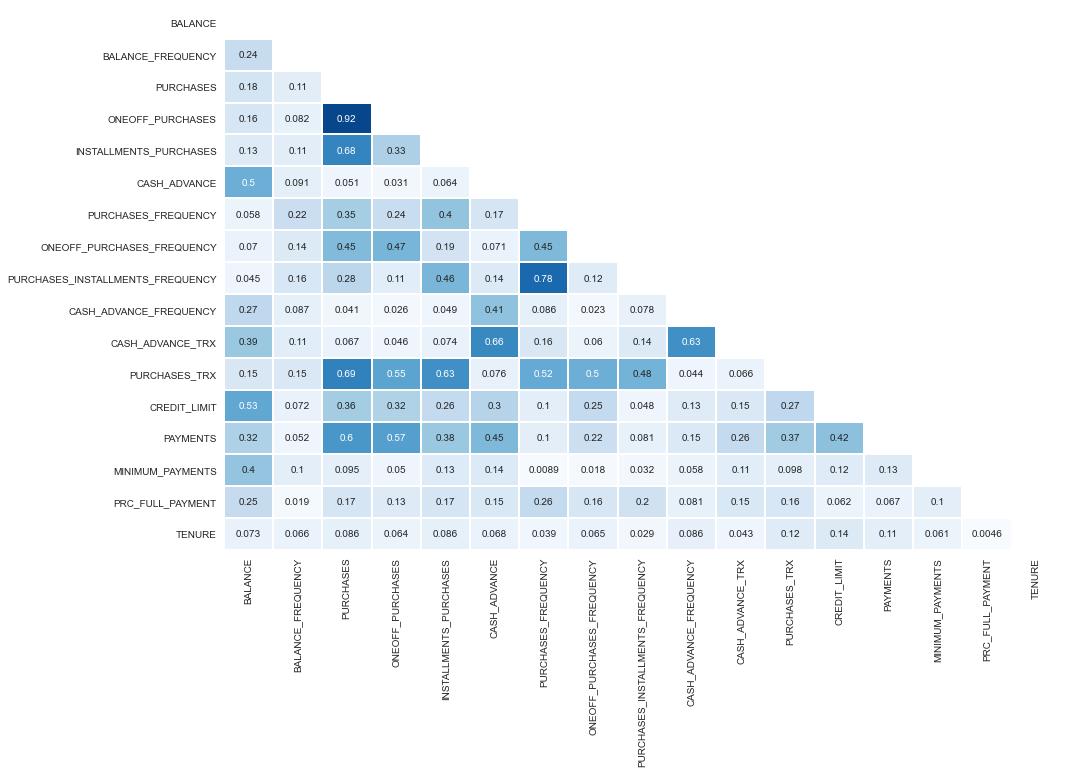

In [9]:
#Function to plot correlation matrix

def correlation_plot(new_df):
    
    corr = abs(new_df.corr()) # correlation matrix
    lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
    mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

    plt.figure(figsize = (15,10))  # setting the figure size
    sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
    sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   # Da Heatmap
    plt.show()
    
correlation_plot(new_df)

### Univariate Analysis

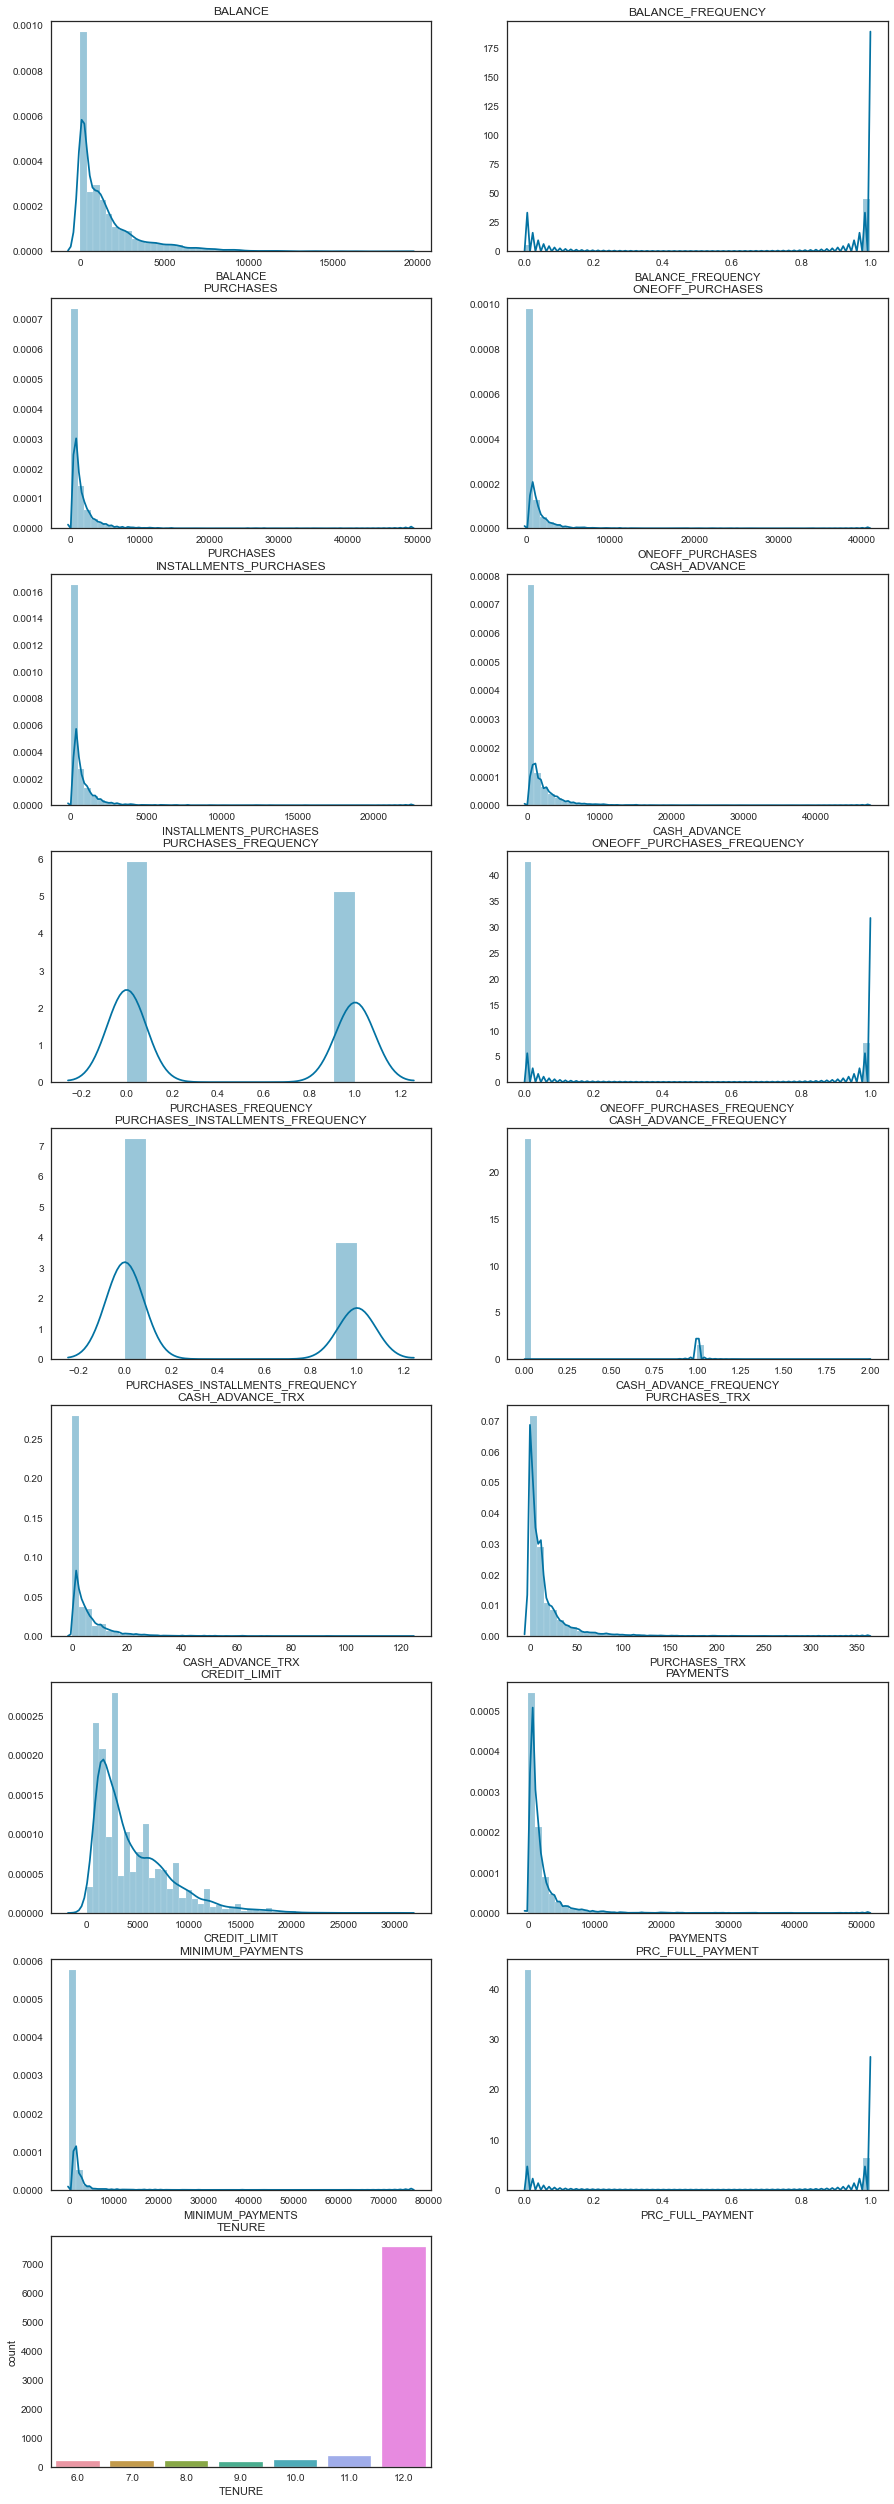

In [10]:
position = 1
plt.figure(figsize=(15,45))

for column in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']:    
    plt.subplot(9,2,position)
    if column in ['TENURE']:
        sns.countplot(new_df[column])
    else:
        sns.distplot(new_df[column])
    plt.title(column)        
    position += 1
plt.show() 

### Outlier Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

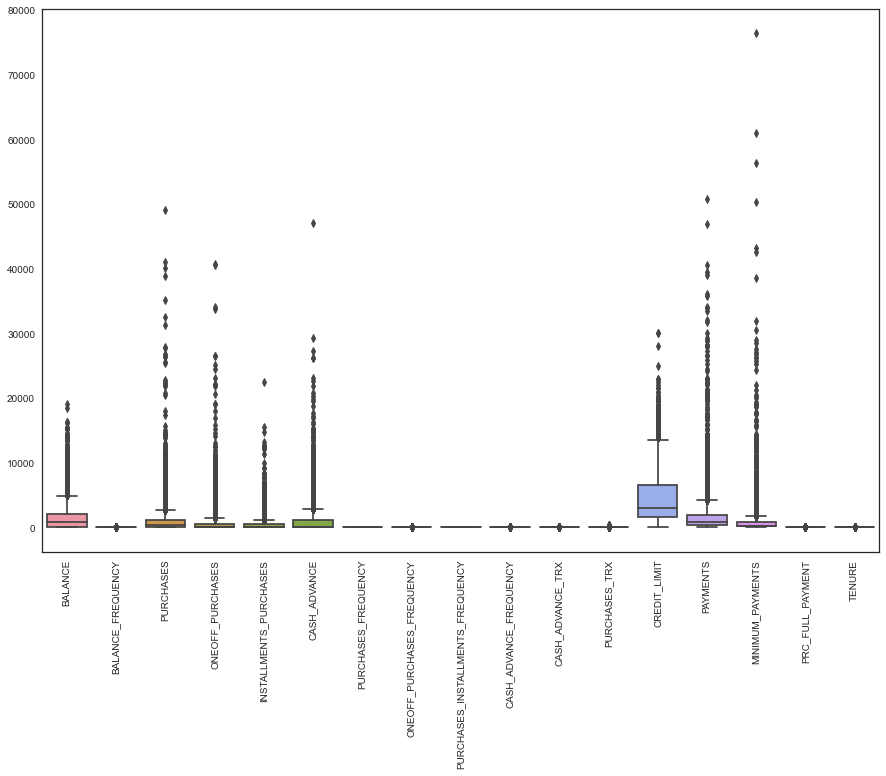

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=new_df)
plt.xticks(rotation=90)

In [12]:
def detect_col_outliers(ls_data):
     # z_score and filter

    mean = np.mean(ls_data)
    std = np.std(ls_data)
   
    return [i for i in ls_data if np.abs(i-mean) > 4*std]

features_outliers = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

for name_col in features_outliers:
    rtdo = detect_col_outliers(new_df[name_col])
    print('-'*50)
    print(name_col)
    print('# values outlier: ', len(rtdo))
    print('{0:.2f}% of the total data'.format(100*len(rtdo)/new_df.shape[0]))

--------------------------------------------------
BALANCE
# values outlier:  70
0.78% of the total data
--------------------------------------------------
BALANCE_FREQUENCY
# values outlier:  0
0.00% of the total data
--------------------------------------------------
PURCHASES
# values outlier:  80
0.89% of the total data
--------------------------------------------------
ONEOFF_PURCHASES
# values outlier:  74
0.83% of the total data
--------------------------------------------------
INSTALLMENTS_PURCHASES
# values outlier:  79
0.88% of the total data
--------------------------------------------------
CASH_ADVANCE
# values outlier:  98
1.09% of the total data
--------------------------------------------------
PURCHASES_FREQUENCY
# values outlier:  0
0.00% of the total data
--------------------------------------------------
ONEOFF_PURCHASES_FREQUENCY
# values outlier:  0
0.00% of the total data
--------------------------------------------------
PURCHASES_INSTALLMENTS_FREQUENCY
# value

#### Since, outliers contribution are very insignificant. We keep as it is.

### Scaling Dataset

In [13]:
df_scaled = StandardScaler().fit_transform(new_df)

### Elbow Plot for KMeans

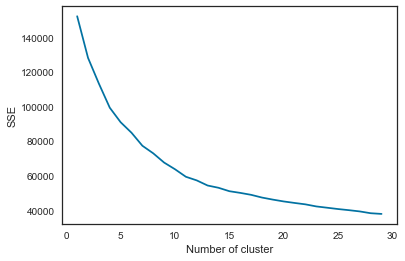

In [14]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Silhouette Plot for KMeans Clustering

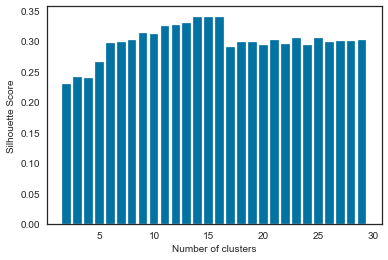

In [15]:
silhouette_scores = [] 

for n_cluster in range(2, 30):
    silhouette_scores.append( 
        silhouette_score(df_scaled, KMeans(n_clusters = n_cluster).fit_predict(df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [16]:
round(silhouette_score(df_scaled, KMeans(n_clusters = 8).fit_predict(df_scaled)), 2)

0.3

#### We choose 8 as the optimal number of clusters as it gives the highest silhouette score and also comparable inertia value. The cluster errors are almost similar and also, the slope of the line is almost constant as well.

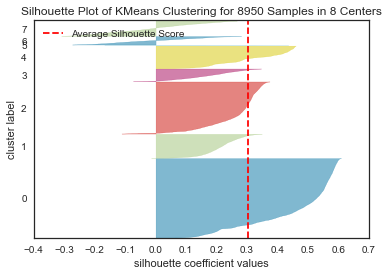

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show() 

### Silhouette Plot for Birch Clustering

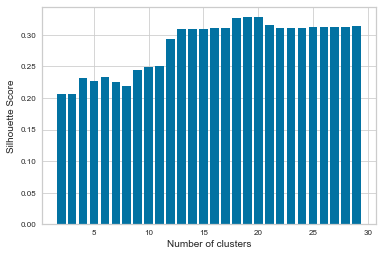

In [21]:
silhouette_scores = [] 

for n_cluster in range(2, 30):
    silhouette_scores.append( 
        silhouette_score(df_scaled, Birch(n_clusters = n_cluster).fit_predict(df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [27]:
 round(silhouette_score(df_scaled, Birch(n_clusters = 13).fit_predict(df_scaled)), 2)

0.31

#### We choose 13 as the optimal number of clusters as it gives the highest silhouette score. The cluster errors are almost similar and also, the slope of the line is almost constant as well.

In [ ]:
model = Birch(13)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show() 

### Silhouette Plot for Agglomerative Clustering

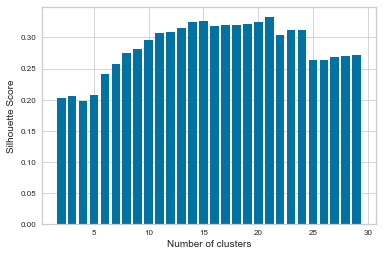

In [22]:
silhouette_scores = [] 

for n_cluster in range(2, 30):
    silhouette_scores.append( 
        silhouette_score(df_scaled, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [26]:
round(silhouette_score(df_scaled, AgglomerativeClustering(n_clusters = 10).fit_predict(df_scaled)), 2)

0.3

#### We choose 10 as the optimal number of clusters as it gives the highest silhouette score. The cluster errors are almost similar and also, the slope of the line is almost constant as well.

### Proceeding with KMeans Clustering

In [36]:
KMeans= KMeans(8)
KMeans.fit(df_scaled)
labels=KMeans.labels_

TypeError: 'KMeans' object is not callable

In [19]:
clusters=pd.concat([new_df, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,41.0,1.0,95.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1000.0,202.0,140.0,0.0,12.0,0
1,3202.0,1.0,0.0,0.0,0.0,6443.0,0.0,0.0,0.0,0.0,4.0,0.0,7000.0,4103.0,1072.0,0.0,12.0,3
2,2495.0,1.0,773.0,773.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,7500.0,622.0,627.0,0.0,12.0,6
3,1667.0,1.0,1499.0,1499.0,0.0,206.0,0.0,0.0,0.0,0.0,1.0,1.0,7500.0,0.0,397.0,0.0,12.0,0
4,818.0,1.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200.0,678.0,245.0,0.0,12.0,0


In [20]:
clusters['PAYMENT_MINPAY'] = round(clusters.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1), 2)

In [21]:
clusters['LIMIT_USAGE'] = round(clusters.apply(lambda x:x['BALANCE']/x['CREDIT_LIMIT'],axis=1), 2)

In [22]:
clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,PAYMENT_MINPAY,LIMIT_USAGE
0,41.0,1.0,95.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1000.0,202.0,140.0,0.0,12.0,0,1.44,0.04
1,3202.0,1.0,0.0,0.0,0.0,6443.0,0.0,0.0,0.0,0.0,4.0,0.0,7000.0,4103.0,1072.0,0.0,12.0,3,3.83,0.46
2,2495.0,1.0,773.0,773.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,7500.0,622.0,627.0,0.0,12.0,6,0.99,0.33
3,1667.0,1.0,1499.0,1499.0,0.0,206.0,0.0,0.0,0.0,0.0,1.0,1.0,7500.0,0.0,397.0,0.0,12.0,0,0.00,0.22
4,818.0,1.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200.0,678.0,245.0,0.0,12.0,0,2.77,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.0,1.0,291.0,0.0,291.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1000.0,326.0,49.0,0.0,6.0,1,6.65,0.03
8946,19.0,1.0,300.0,0.0,300.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1000.0,276.0,160.0,0.0,6.0,1,1.72,0.02
8947,23.0,1.0,144.0,0.0,144.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,1000.0,81.0,82.0,0.0,6.0,1,0.99,0.02
8948,13.0,1.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,2.0,0.0,500.0,53.0,56.0,0.0,6.0,0,0.95,0.03


### Cluster Interpretation 

#### Key Performance Indicator

BALANCE monthly average purchase

CASH_ADVANCE cash advance amount

ONEOFF_PURCHASES Total amount of one-off purchases

INSTALLMENTS_PURCHASES Total amount of installment purchases

PURCHASES_TRX average amount per purchase

CASH_ADVANCE_TRX cash advance transaction

BALANCE / CREDIT_LIMIT limit usage (balance to credit limit ratio)

PAYMENTS / MINIMUM_PAYMENTS payments to minimum payments ratio

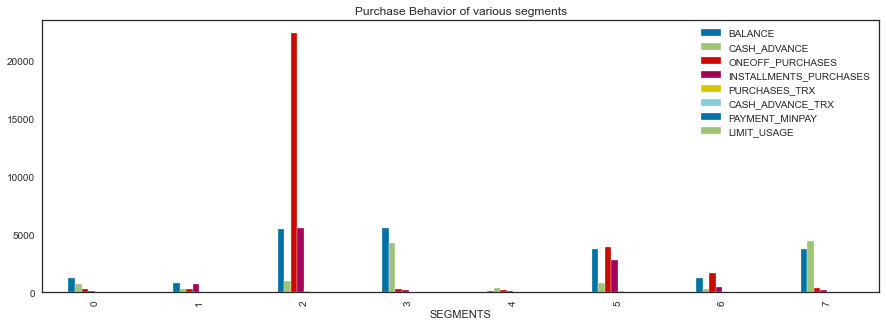

In [23]:
(clusters[['BALANCE', 'CASH_ADVANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PAYMENT_MINPAY', 'LIMIT_USAGE', 'cluster']].groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS');

### Observations

#### Cluster 3
This cluster shows significantly high ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES. Also has high BALANCE. Customers in this cluster has very high spending capacity. Targeted marketing campaign could be term useful.

#### Cluster 5 & 6
This cluster shows significantly high BALANCE & CASH_ADVANCE. Potential Customers with the ability to spend more.

#### Cluster 7
This cluster shows average spending capability. Marketing campaign may be fruitful.

#### Cluster 0, 1, 2 and 4
This cluster shows below average spending capability. Any marketing campaign will be futile attempt.

#### t-SNE provides great visualizations when the individual samples can be labeled

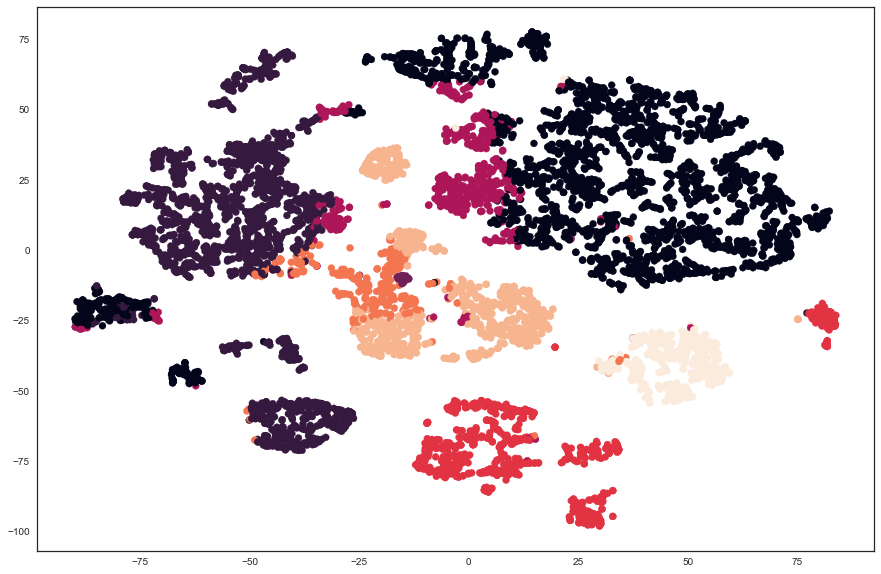

In [34]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]

plt.figure(figsize=(15,10))
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=labels)
plt.show()

#### Dimensionality reduction with PCA


In [27]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 2)

pca.fit(df_scaled)
pca_features=pca.transform(df_scaled)

print(pca_features.shape)

(8950, 2)


Notice PCA reduced the high dimension features of 17 to intrinsic dimension of 2. However, the observations remains same



In [28]:
# Create a dataframe with the two PCA components
pca_df = pd.DataFrame(data=pca_features,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.694144,-0.650257
1,-0.640663,2.447216
2,0.731912,-0.370186
3,-0.611828,0.195169
4,-1.636687,-0.428461


In [29]:
# Concatenate the clusters labels to the dataframe
fin_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
fin_df.head()

,pca1,pca2,cluster
0,-1.694144,-0.650257,0
1,-0.640663,2.447216,3
2,0.731912,-0.370186,6
3,-0.611828,0.195169,0
4,-1.636687,-0.428461,0


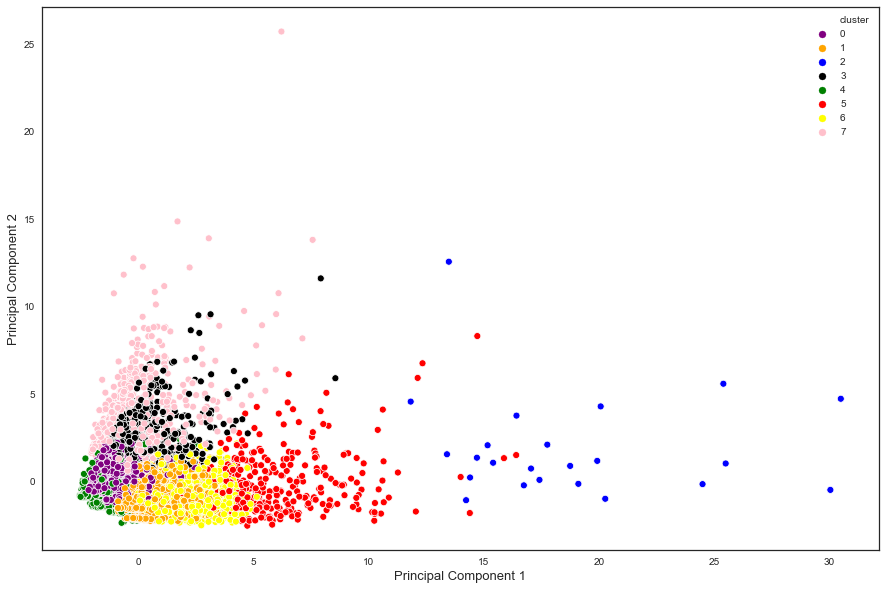

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=fin_df, palette=['purple','orange','blue','black', 'green', 'red', 'yellow', 'pink'])
plt.xlabel('Principal Component 1', fontsize=13)
plt.ylabel('Principal Component 2', fontsize=13)
plt.show()